# Day 1 課題

## 概要
KaggleのKickstarterのデータを用いて、ロジスティック回帰を使用して、機械学習のモデルを作成する。

## 内容
Kaggleにある"Kickstarter Project"のデータを用いて、あるクラウドファンディングが成功するか(state)を事前に予測するモデルを構築する。

作業内容として、以下を行う。
1. データを取得し読み込む。
2. データに関する確認作業を行う。
3. データに関する検討を行う。
4. データを用意する。
5. モデルを作成する。
6. 計算（学習）させ、結果を表示する。ただし、使用する項目についていくつかのパターンを設ける。

ただし、今回はロジスティック回帰を使用して、予測する。

## データの取得と読み込み
必要なライブラリのインポートを行う。

In [155]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import *

from datetime import datetime as dt

from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix
from sklearn.linear_model import LinearRegression, SGDClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error # 回帰問題における性能評価に関する関数
from  sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix # 回帰問題における性能評価に関する関数

データを取得し読み込む。
また、データの中身を確認する。

データはKaggleのKickstarterプロジェクトから取得した以下のデータを用いる。
- ks-projects-201801.csv

取得したデータは以下に置いてあるものとする。
- ../1_data/ks-projects-201801.csv

In [156]:
df_ks = pd.read_csv("../1_data/ks-projects-201801.csv")

## データに関する確認作業

In [204]:
# データの内容を表示させる。
#display(df_ks.head())
display(df_ks)
df_ks.describe()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00


,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [158]:
#　項目についての確認
df_ks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [159]:
# 欠損値についての確認
df_ks.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

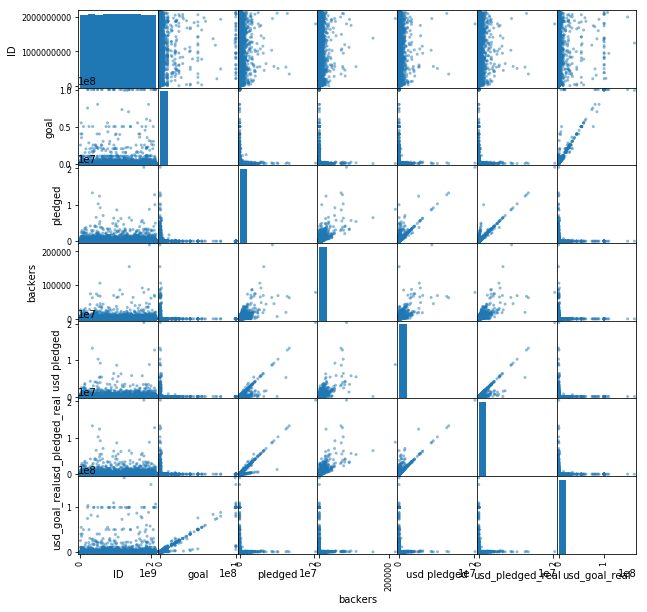

In [160]:
# 散布図行列
pd.plotting.scatter_matrix(df_ks, figsize=(10,10))
plt.show()

In [161]:
df_ks.corr()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
ID,1.000000,0.001679,0.000466,0.000654,-0.000633,-0.000025,0.001854
goal,0.001679,1.000000,0.007358,0.004012,0.005534,0.005104,0.942692
pledged,0.000466,0.007358,1.000000,0.717079,0.857370,0.952843,0.005024
backers,0.000654,0.004012,0.717079,1.000000,0.697426,0.752539,0.004517
usd pledged,-0.000633,0.005534,0.857370,0.697426,1.000000,0.907743,0.006172
usd_pledged_real,-0.000025,0.005104,0.952843,0.752539,0.907743,1.000000,0.005596
usd_goal_real,0.001854,0.942692,0.005024,0.004517,0.006172,0.005596,1.000000


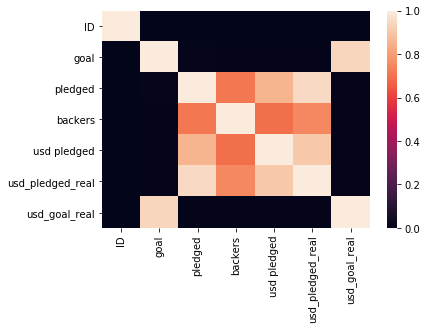

In [162]:
sns.heatmap(df_ks.corr())
plt.show()

### データ確認時点での考察
とりあえず、この時点での外観を考察する。
- データの総数は378661個
- 欠損値のある項目はname,usd pledged
- 目的変数(State)にsuccessful,failed以外にcanceled等があり、状態として成功、失敗だけではない。
- goalを設定して、predgedがそのgoalを超えたら成功となると思われる。
- backers,pledgedなど、結果としてそのまま目的変数に結びついてしまう変数と思われるため、スタート時点の予測には使えないので省く必要がある。（どの項目を省くかは要検討）
- categroy,main_categoryは分類だが、どれくらいまで細かく分類されているか見る必要がある。
- goalは通貨が混ざった形で、USドルに換算したものが、usd_goal_realと考えられるので、相関が大きいのは当然と考えられる。よって、USドル換算のusd_goal_realを用いた方が、比較として適している。

## データの検討
### 項目における検討
始めに、各項目について確認し、説明変数としての使用できるかどうかの検討を行う。
項目についての表は以下の通りとなる。
また、各項目についての検討および説明変数としての採用可否についても記述する。

ただし、この時点ではデータの内容については詳細に参照していないため、あくまで採用の可能性とし、最終的な採用可否の結果とはしない。
最終的には、項目およびデータの内容の双方から判断する。


| 項目 | 意味 | 検討 | 説明変数として採用可否 |
|---|---|---|---|
| ID | 通し番号  |  プロジェクトを識別する項目のため、説明変数として不採用 | 不採用 | 
| name | 名前 |  プロジェクトを識別する項目のため、説明変数として不採用 | 不採用 |
| category | 分類　| 分類なので質的変数として採用 | 採用 | 
| main_category | 大分類  |　大分類なので質的変数として採用 | 採用 |
| currency | 通貨 | 通貨が異なり、別にUSドル換算の値が存在するため、不採用 |  不採用 |
| deadline | 終了日時 | 終了月を使用、また期間に使用 | 採用（ただし、期間、終了月として加工する） |
| goal | 目標金額 | 通貨が異なり、別にUSドル換算の値が存在するため、不採用 | 不採用 |
| launched | 開始日時  | 開始月を使用、また期間に使用 | 採用（ただし、期間、開始月として加工する） |
| pledged | 到達金額  | 結果としての金額と思われるため、予測のための説明変数として用いることが不適切 | 不採用 |
| state | 状態  | 目的変数となるため、説明変数としては不採用 | 不採用（目的変数） |
| backers | 支援者数 | 結果になり、予測のための説明変数として用いることが不適切 | 不採用 |
| country |　国 | 国によって異なる可能性があるため、質的変数として採用 | 採用 |
| usd pledged | 到達金額のUSドル換算(Kickstarterによる換算) | 結果としての金額と思われるため、予測のための説明変数として用いることが不適切 | 不採用 |
| usd_pledged_real | 到達金額のUSドル換算(Fixer.io）| 結果としての金額と思われるため、予測のための説明変数として用いることが不適切 | 不採用 |
| usd_goal_real | 目標金額のUSドル換算 | 統一された通過で換算した目標金額なので採用 | 採用 |

上記から以下の項目について、説明変数として用いることを考える。
- category(要検討）　 : 分類
- main_category(要検討） : 大分類
- deadline(要加工） : 終了日時
- launched(要加工） : 開始日時
- country : 国
- usd_goal_real : 目標金額のドル換算

また、目的変数は以下となる。
- state : 状態

### データにおける検討
以下の検討を行う。
- 目的変数の検討
- 説明変数の検討

#### 目的変数の検討
null値による欠損値は存在するが、説明変数および目的変数として使用することを検討している項目についてはnull値の欠損値が存在しない。
ただし、目的変数(state)によって、そのデータを使用できるのか検討する必要があるため、種類を参照する。

In [163]:
df_ks["state"].value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

今回、successful(成功）したかどうかだが、successfulとfailed以外は判断が不明なので、対象としない。

In [164]:
print(df_ks.loc[(df_ks["state"]=="successful")|(df_ks["state"]=="failed")]["state"].value_counts())
print(df_ks.loc[(df_ks["state"]=="successful")|(df_ks["state"]=="failed")].info())

failed        197719
successful    133956
Name: state, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 331675 entries, 0 to 378660
Data columns (total 15 columns):
ID                  331675 non-null int64
name                331672 non-null object
category            331675 non-null object
main_category       331675 non-null object
currency            331675 non-null object
deadline            331675 non-null object
goal                331675 non-null float64
launched            331675 non-null object
pledged             331675 non-null float64
state               331675 non-null object
backers             331675 non-null int64
country             331675 non-null object
usd pledged         331465 non-null float64
usd_pledged_real    331675 non-null float64
usd_goal_real       331675 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 40.5+ MB
None


上記により"state"の項目について以下が分かる。
- "successful"の数は133956個
- "failed"の数は197719個
- 総数は331675個
- "successful","failed"のみの場合、欠損値はなし

#### 目的変数の結果におけるデータの加工
一旦、説明変数と目的変数の関係の検討を行いやすいようにするため、データに対して以下の処理を行う。

目的変数(state)の値をsuccessfulの場合はTrue(1),FaildはFalse(0)とし、新しい変数state_boolに格納する。
それ以外の行は削除する。（対象としない）

In [165]:
# sucessfulとfailed以外を削除する関数
def remove_date_about_state(df_ks):
    df_ks_result = df_ks[(df_ks["state"] == "successful")|(df_ks["state"] == "failed")].copy()
    return df_ks_result

df_ks_result = remove_date_about_state(df_ks)


#### 説明変数の検討
各説明変数の検討を行う。

In [166]:
# グラフ表示用メソッド定義
def plot_graph(df, item_name):
    fig,ax = plt.subplots(1,2, figsize=(20,6))

    # 項目のグラフ表示
    sns_ax = ax[0]
    sns_item=sns.countplot(df[item_name],order=np.sort(df[item_name].unique()), ax=sns_ax)
    sns_item.set_xticklabels(sns_item.get_xticklabels(), rotation=90, ha="right")  # 90度回転
    
    #　項目の成否の割合
    cross_ax = ax[1]
    cross_item = pd.crosstab(df[item_name],df['state'],normalize='index')
    cross_item.plot.bar(stacked=True, ax=cross_ax)

    plt.tight_layout()
    plt.show()

#### 目標金額のドル換算の検討
目標金額のドル換算に関する検討を行う。


平均、中央値、最大値、最小値、分散、標準偏差およびヒストグラム（縦軸は対数）は以下のようになる。

平均:41510.002
中央値:5000.000
最大値:166361390.710
最小値:0.010
分散:1229724997673.479
標準偏差:1108929.663


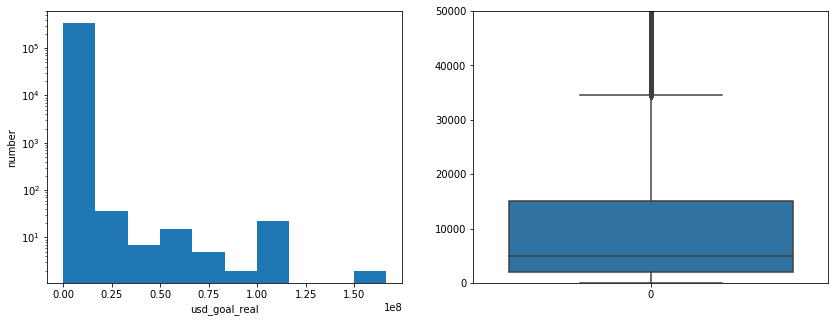

In [167]:
usd_goal_real_list = df_ks_result['usd_goal_real']

print("平均:{:.3f}".format(usd_goal_real_list.mean()))
print("中央値:{:.3f}".format(usd_goal_real_list.median()))
print("最大値:{:.3f}".format(usd_goal_real_list.max()))
print("最小値:{:.3f}".format(usd_goal_real_list.min()))
print("分散:{:.3f}".format(usd_goal_real_list.var()))
print("標準偏差:{:.3f}".format(usd_goal_real_list.std()))

# 縦軸は対数で表す。
fig,ax = plt.subplots(1,2,figsize = (14,5))
ax[0].hist(usd_goal_real_list,log=True)
ax[0].set_xlabel('usd_goal_real')
ax[0].set_ylabel('number')

# 箱髭図
sns.boxplot(data=usd_goal_real_list,ax=ax[1])
ax[1].set(ylim=(0,50000)) # 上限を制限
plt.show()

(考察）　目標金額のばらつきは大きいが、観測値ではなくあくまで個々の設定値であるため、外れ値とは言い難い。

#### 開始日時、終了日時の検討
開始日時および終了日時について検討する。

In [168]:
# 期間、開始日時の月、終了日時の月を項目として加える関数
def add_item_days_month(df_ks_result):
    # 期間算出
    #df_ks_result["days"] = df_ks_result.apply(lambda x: (dt.strptime(x['deadline'], '%Y-%m-%d') - dt.strptime(x['launched'], '%Y-%m-%d %H:%M:%S')).days , axis=1)
    df_ks_result.loc[df_ks_result["deadline"].isnull() == False, "days"] = df_ks_result.apply(lambda x: (dt.strptime(x["deadline"], '%Y-%m-%d') - dt.strptime(x["launched"], '%Y-%m-%d %H:%M:%S')).days , axis=1)

    # 月算出
    launched_month_func = lambda launched : dt.strptime(launched, '%Y-%m-%d %H:%M:%S').month
    #df_ks_result["launched_month"] = df_ks_result['launched'].map( launched_month_func)
    df_ks_result.loc[df_ks_result["launched"].isnull()==False,"launched_month"] = df_ks_result["launched"].map( launched_month_func)

    deadline_month_func = lambda deadline : dt.strptime(deadline, '%Y-%m-%d').month
    #df_ks_result["deadline_month"] = df_ks_result['deadline'].map(deadline_month_func)
    df_ks_result.loc[df_ks_result["deadline"].isnull()==False,"deadline_month"] = df_ks_result["deadline"].map( deadline_month_func)
    
add_item_days_month(df_ks_result)

平均:32.955
中央値:29.000
最大値:91.000
最小値:0.000
分散:161.629
標準偏差:12.713


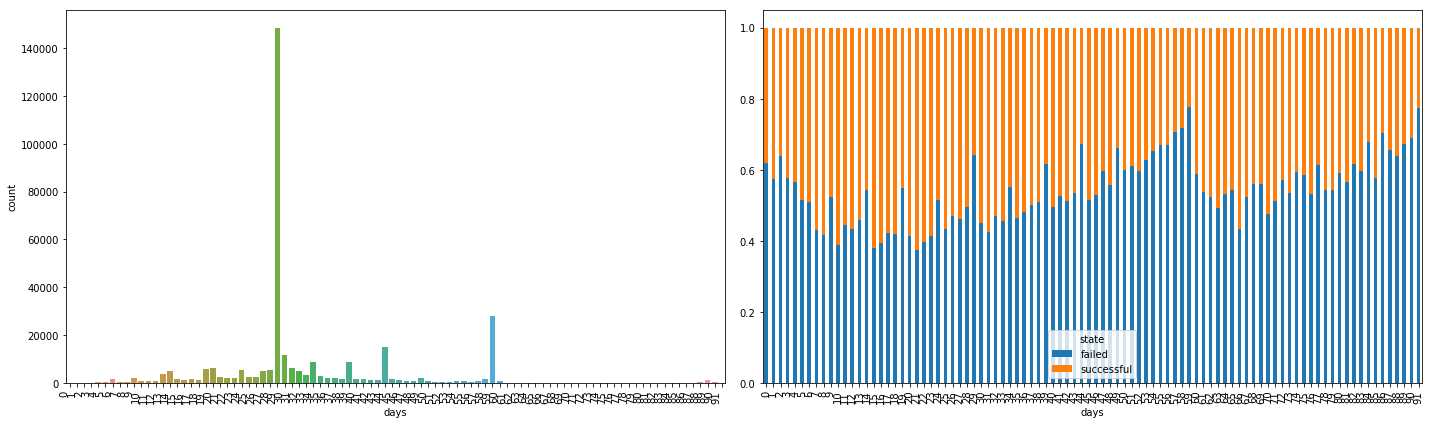

In [169]:
days_list = df_ks_result['days']

print("平均:{:.3f}".format(days_list.mean()))
print("中央値:{:.3f}".format(days_list.median()))
print("最大値:{:.3f}".format(days_list.max()))
print("最小値:{:.3f}".format(days_list.min()))
print("分散:{:.3f}".format(days_list.var()))
print("標準偏差:{:.3f}".format(days_list.std()))

# 期間毎の数および期間毎の成否の割合
plot_graph(df_ks_result,'days')

(考察）　特定の期間の設定が突出している。

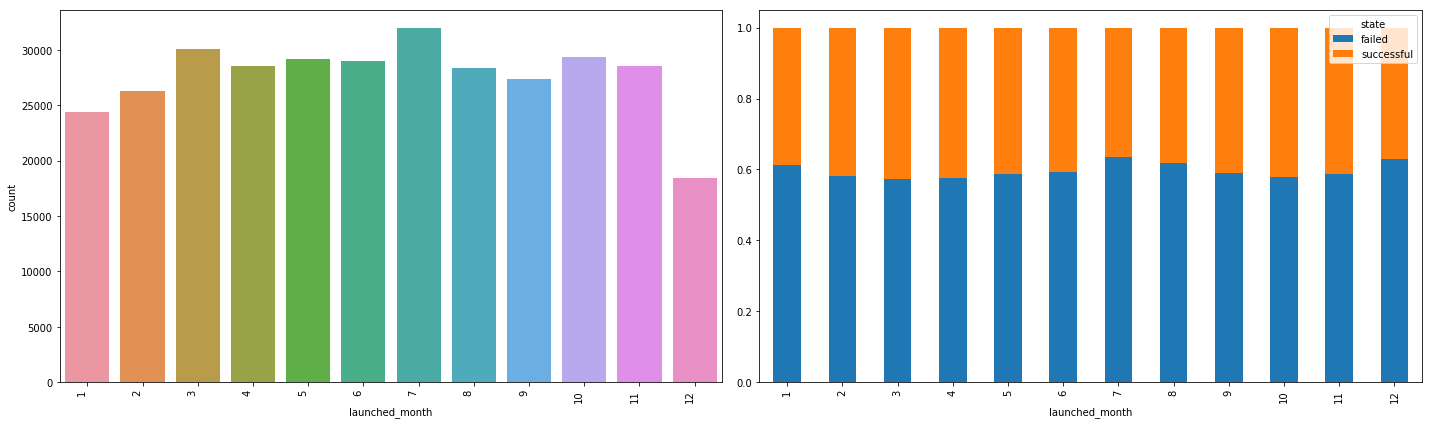

In [170]:
# 開始月毎の数および開始月毎の成否の割合
plot_graph(df_ks_result,'launched_month')

　(考察）　開始月毎の成功、失敗の差はあまりない。

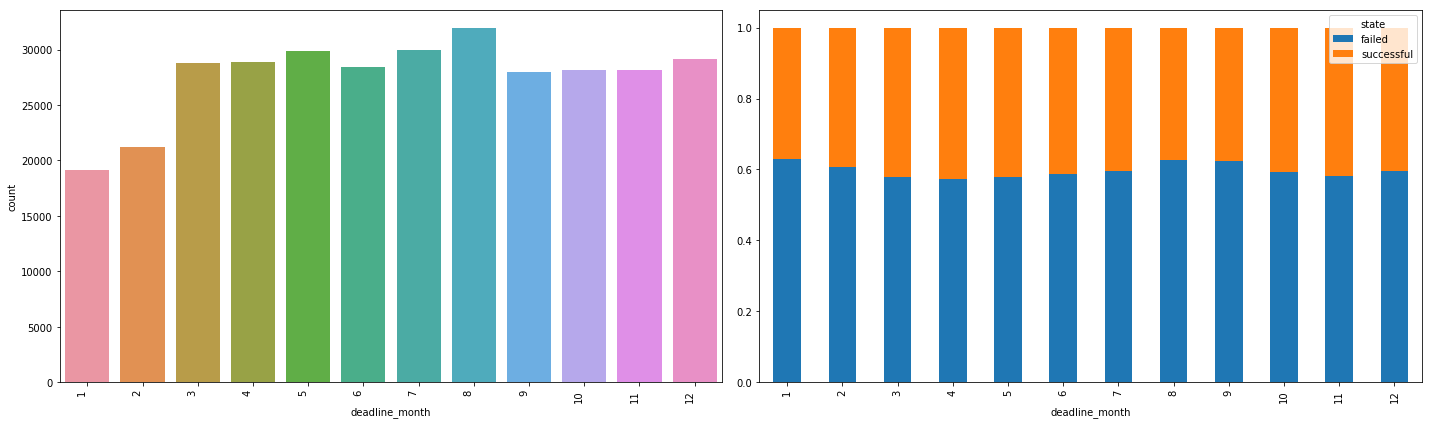

In [171]:
# 終了月毎の数および終了月毎の成否の割合
plot_graph(df_ks_result,'deadline_month')

　(考察）　終了月毎の成功、失敗の差はあまりない。

#### 国の検討
国(country)について検討する。

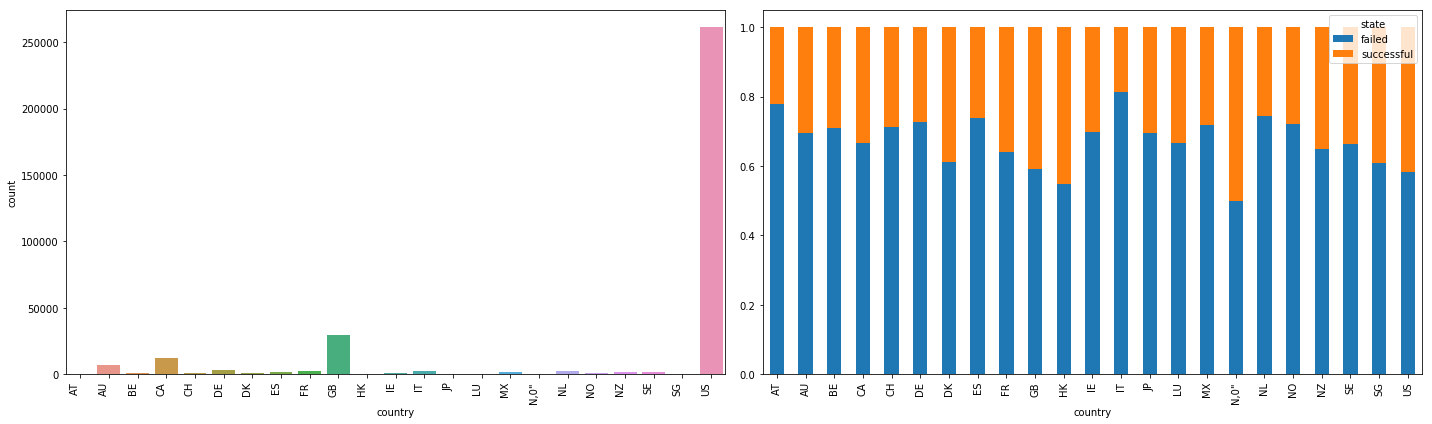

In [172]:
# 国毎の数および国毎の成否の割合
plot_graph(df_ks_result,'country')

（考察）　総数ではUSが突出している。　国毎で成功、失敗のばらつきがある。

#### 分類の検討
分類(category)および大分類(main_category)について検討する。

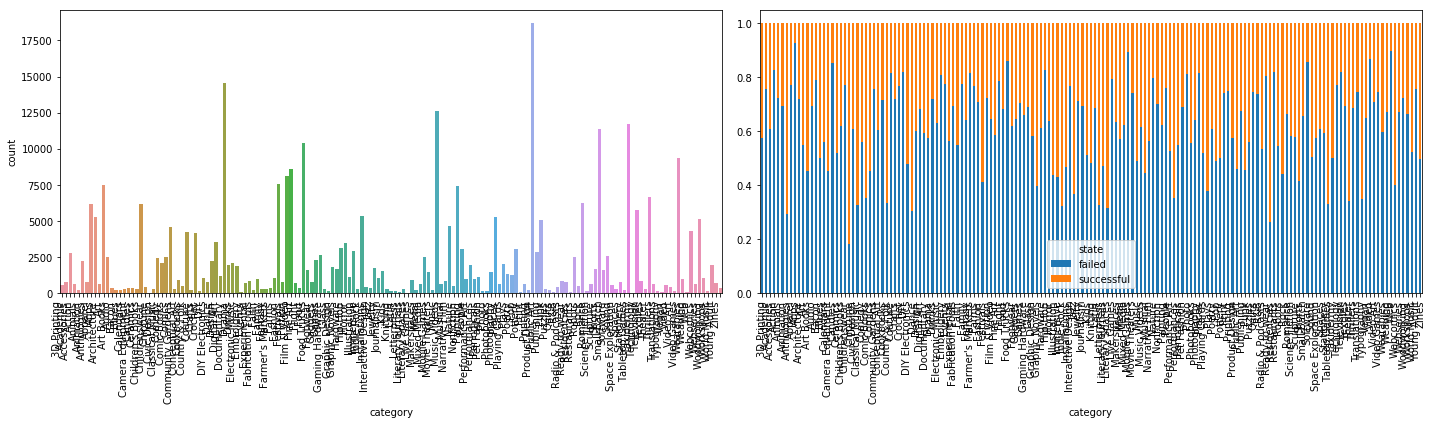

In [173]:
# 分類毎の数および分類毎の成否の割合
plot_graph(df_ks_result,'category')

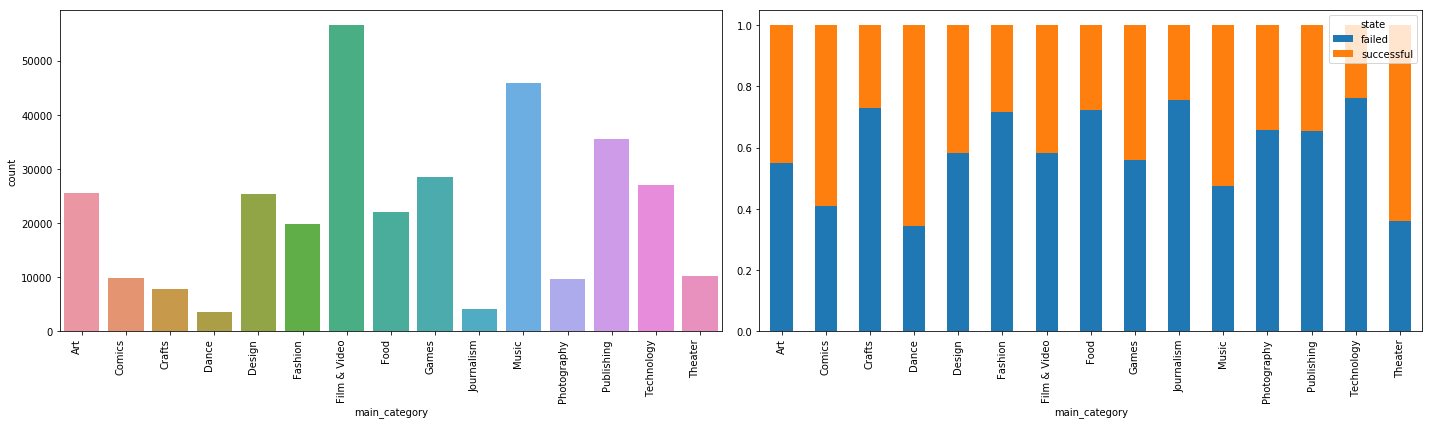

In [174]:
# 大分類毎の数および大分類毎の成否の割合
plot_graph(df_ks_result,'main_category')

（考察）　分類、大分類の種類毎で、成功、失敗のばらつきがある。

#### 目標金額のドル換算と期間の対応

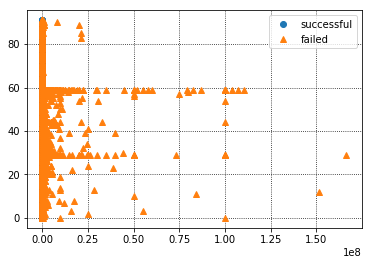

In [175]:
# データの分割
df_ks_succ = df_ks_result[df_ks_result["state"] == "successful"] # 成功と判断されたデータ
df_ks_exsucc = df_ks_result[df_ks_result["state"] == "failed"] # 成功以外のデータ

# 散布図
plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='black',linestyle=':')
plt.plot(df_ks_succ["usd_goal_real"], df_ks_succ["days"], 'o', color='C0', label='successful')
plt.plot(df_ks_exsucc["usd_goal_real"], df_ks_exsucc["days"], '^', color='C1', label='failed')
plt.legend(loc='best')
plt.show()


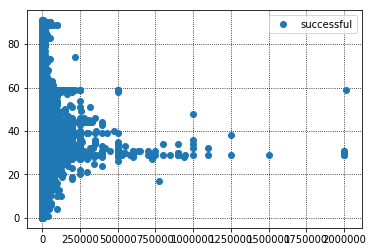

In [176]:
# 成功したデータのみ
df_ks_succ = df_ks_result[(df_ks_result["state"] == "successful")] # 成功と判断されたデータ

# 散布図
plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='black',linestyle=':')
plt.plot(df_ks_succ["usd_goal_real"], df_ks_succ["days"], 'o', color='C0', label='successful')
plt.legend(loc='best')
plt.show()

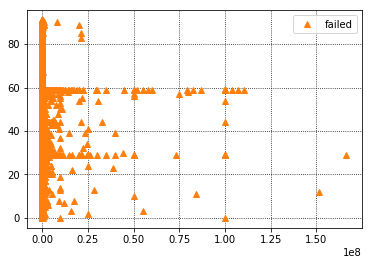

In [177]:
# 失敗したデータのみ
df_ks_succ = df_ks_result[(df_ks_result["state"] ==  "failed")] # 失敗と判断されたデータ

# 散布図
plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='black',linestyle=':')
plt.plot(df_ks_exsucc["usd_goal_real"], df_ks_exsucc["days"], '^', color='C1', label='failed')
plt.legend(loc='best')
plt.show()

（考察）　期間が30日付近では、目標金額が大きい場合でも成功する場合があるが、60日付近では、金額の大きいプロジェクトは失敗が多い。

ただし、金額が一定以上大きいと、期間に関係なく、失敗している。

### 検討結果
各項目およびデータにおける検討結果からデータを下記のように扱うものとする。
- 目的変数(state)はliveをのぞいて、successfulをTrue(1)、それ以外をFalse(0)とする。
- 目的変数(state) が"successful"と"failed"以外のデータは除外する。
- 目標金額のドル換算(usd_goal_real)
- 終了日時(deadline)と開始日時(launched)は「期間」、「開始月」、「終了月」に変換して使用する。
- 国(country)
- 分類(category)
- 大分類(main_category)

## データの用意
元のデータから必要な項目を取得、変換を行い、訓練を行うためのデータ用意する
列となる項目は以下とする。

| 項目 | 内容 |　備考 |
| --- | --- | --- |
| state_bool | 目的変数 | stateがsuccessfulの場合、True(1)　failedの場合、False(0)とする。 |
| usd_goal_real | 目標金額のドル換算 | 目標金額のドル換算を格納する。 |
| days | 期間 | 開始日時と終了日時から算出した日数 |
| launched_month | 開始月 | 開始日時から算出した開始月。　ダミー変数に変換する。 |
| deadline_month | 終了月 | 終了日時から算出した終了月。 ダミー変数に変換する。 |
| country | 国 | 元データの分類をダミー変数に変換する。  |
| category | 分類 | 元データの分類をダミー変数に変換する。 |
| main_category | 大分類 | 元データの大分類をダミー変数に変換する。 | 

### 定数の用意

In [178]:
# 削除する列の定義
drop_list = ("state","goal","ID","name","currency","deadline","launched","pledged","backers","usd pledged","usd_pledged_real")

# 使用する項目のリスト
item_list = ("state_bool","usd_goal_real","days","lauched_month","deadline_month","country","category","main_category")

# ダミー変数化する項目
dummy_items = ['launched_month','deadline_month','country','category','main_category']

### データ格納領域の用意

In [179]:
# "state"の"successful"と"failed"以外を削除
df_ks_data = remove_date_about_state(df_ks)

# successfulをTrueとし、それ以外をFalseに設定する関数
def change_data_about_state(df_ks):
    df_ks.loc[df_ks['state'] == 'successful', "state_bool"] = True
    df_ks.loc[df_ks['state'] != 'successful',"state_bool"] = False
    
change_data_about_state(df_ks_data)


### 目標金額のドル換算
この項目は変更しない。

In [180]:
# 変更なし

### 期間の算出、開始月、終了月の算出

In [181]:
add_item_days_month(df_ks_data)

### 不必要な項目の削除

In [182]:
# 結果などの予測に使えないデータを予め削除
for item in drop_list:
        df_ks_data = df_ks_data.drop(item, axis=1)

## 学習および結果
データからモデルを作成し、計算後、Precision,Recall,F1や混同行列を出力する。

各値は、stateがsuccessful(state_boolがtrue)を正として、考える。

また、モデルを作成するに際、項目を全て使用するパターンと、一部を落として作成するパータンをいくつか試す。

### 共通関数の定義
複数の学習を行う際に共通で使用するメソッドを定義する。

In [183]:
def make_model(df_arg):
    y = df_arg["state_bool"].values
    X = df_arg.drop('state_bool', axis=1)
    clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=1234, tol=1e-3)
    clf.fit(X, y)
    return clf,X,y

# 予測
def run_model(clf,X):
    # ラベルを予測
    y_est = clf.predict(X)
    return y_est

# 結果の表示
def print_result(y, y_est):
    # 対数尤度を表示
    print('対数尤度 = {:.3f}'.format(- log_loss(y, y_est)))

    # 正答率を計算
    accuracy =  accuracy_score(y, y_est)
    print('正答率（Accuracy） = {:.3f}%'.format(100 * accuracy))

    # Precision, Recall, F1-scoreを計算
    precision, recall, f1_score, _ = precision_recall_fscore_support(y, y_est)

    # state_book が Trueに関するPrecision, Recall, F1-scoreを表示
    # precision[1],recall[1],f1_score[1]で取得しているため、修正の可能性あり。（0で取得かどうか不明）
    print('適合率（Precision） = {:.3f}%'.format(100 * precision[1]))
    print('再現率（Recall） = {:.3f}%'.format(100 * recall[1]))
    print('F1値（F1-score） = {:.3f}%'.format(100 * f1_score[1]))
    
    
# 予測値と正解のクロス集計
def make_cross(y,y_est):
    conf_mat = pd.DataFrame(confusion_matrix(y, y_est), 
                        index=['正解 = 失敗', '正解 = 成功'], 
                        columns=['予測 = 失敗', '予測 = 成功'])
    return conf_mat


### 全項目を使用した場合
予め削除した項目以外の全項目を使用した場合を考える。

#### ダミー変数化
pandasのget_dummiesメソッドによるダミー化を行う。
ただし、deadline_monthおよびlaunched_monthは数値なので、注意する。

In [184]:
df_ks_data_all = pd.get_dummies(df_ks_data,  columns=dummy_items ,drop_first = True)

In [185]:
display(df_ks_data_all.head())

,usd_goal_real,state_bool,days,launched_month_2,launched_month_3,launched_month_4,launched_month_5,launched_month_6,launched_month_7,launched_month_8,...,main_category_Fashion,main_category_Film & Video,main_category_Food,main_category_Games,main_category_Journalism,main_category_Music,main_category_Photography,main_category_Publishing,main_category_Technology,main_category_Theater
0,1533.95,False,58,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,30000.00,False,59,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,45000.00,False,44,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,5000.00,False,29,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,50000.00,True,34,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


#### モデル作成

In [186]:
clf, X, y = make_model(df_ks_data_all)
clf

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=10000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='none',
       power_t=0.5, random_state=1234, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False)

#### 計算

In [187]:
# ラベルを予測
y_est = run_model(clf,X)

# 結果を表示
print_result(y,y_est)
# 予測値と正解のクロス集計
conf_mat = make_cross(y,y_est)
conf_mat

対数尤度 = -15.409
正答率（Accuracy） = 55.387%
適合率（Precision） = 46.725%
再現率（Recall） = 74.625%
F1値（F1-score） = 57.468%


,予測 = 失敗,予測 = 成功
正解 = 失敗,83742,113977
正解 = 成功,33992,99964


（考察）　一旦これを基準に考える。

### 期間、開始月、終了月を使用しない場合
開始日時、終了日時に関連する項目を使用しないで、算出してみる。

In [188]:
# 期間、開始月、終了月の列を削除したデータを作成する。
drop_list_time = ["launched_month","deadline_month","days"]
df_ks_data_drop = df_ks_data.copy()
for item in drop_list_time:
        df_ks_data_drop = df_ks_data_drop.drop(item, axis=1)

In [189]:
# ダミー変数化
dummy_items_time = dummy_items.copy()

# 開始月、終了月は削除しているので、ダミー変数にはしない。
for item in ("launched_month","deadline_month"):
    dummy_items_time.remove(item)
df_ks_data_drop_time = pd.get_dummies(df_ks_data_drop,  columns=dummy_items_time ,drop_first = True)

In [190]:
# モデル作成
clf, X, y = make_model(df_ks_data_drop_time)
clf

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=10000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='none',
       power_t=0.5, random_state=1234, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [191]:
# ラベルを予測
y_est = run_model(clf,X)

# 結果を表示
print_result(y,y_est)

# 予測値と正解のクロス集計
conf_mat = make_cross(y,y_est)
conf_mat

対数尤度 = -13.950
正答率（Accuracy） = 59.612%
適合率（Precision） = 33.333%
再現率（Recall） = 0.001%
F1値（F1-score） = 0.001%


,予測 = 失敗,予測 = 成功
正解 = 失敗,197717,2
正解 = 成功,133955,1


(考察)　混同行列や再現率を見ても、使えるように思えない。

### 目標金額を使用しない場合
目標金額のドル換算の項目を使用しないで算出する。

In [192]:
# 目標金額のドル換算を削除
drop_list_time = ["usd_goal_real"]
df_ks_data_drop = df_ks_data.copy()
for item in drop_list_time:
        df_ks_data_drop = df_ks_data_drop.drop(item, axis=1)

In [193]:
# ダミー変数化
df_ks_data_drop_goal = pd.get_dummies(df_ks_data_drop,  columns=dummy_items ,drop_first = True)

In [194]:
# モデル作成
clf, X, y = make_model(df_ks_data_drop_goal)
clf

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=10000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='none',
       power_t=0.5, random_state=1234, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [195]:
# ラベルを予測
y_est = run_model(clf,X)

# 結果を表示
print_result(y,y_est)

# 予測値と正解のクロス集計
conf_mat = make_cross(y,y_est)
conf_mat

対数尤度 = -11.905
正答率（Accuracy） = 65.531%
適合率（Precision） = 64.819%
再現率（Recall） = 32.052%
F1値（F1-score） = 42.893%


,予測 = 失敗,予測 = 成功
正解 = 失敗,174416,23303
正解 = 成功,91021,42935


（考察）　正答率、適合率は上がったが、再現率、F1値は下がった。

### 分類、大分類を使用しない場合
分類、大分類を使用しないで算出する。

In [196]:
# 分類、大分類を削除
drop_list_category = ["category","main_category"]
df_ks_data_drop = df_ks_data.copy()
for item in drop_list_category:
        df_ks_data_drop = df_ks_data_drop.drop(item, axis=1)

In [197]:
# ダミー変数化
dummy_items_category = dummy_items.copy()
for item in ("category","main_category"):
    dummy_items_category.remove(item)
df_ks_data_drop_category = pd.get_dummies(df_ks_data_drop,  columns=dummy_items_category ,drop_first = True)

In [198]:
# モデル作成
clf, X, y = make_model(df_ks_data_drop_category)
clf

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=10000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='none',
       power_t=0.5, random_state=1234, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [199]:
# ラベルを予測
y_est = run_model(clf,X)

# 結果を表示
print_result(y,y_est)

# 予測値と正解のクロス集計
conf_mat = make_cross(y,y_est)
conf_mat

対数尤度 = -15.415
正答率（Accuracy） = 55.369%
適合率（Precision） = 46.727%
再現率（Recall） = 75.003%
F1値（F1-score） = 57.581%


,予測 = 失敗,予測 = 成功
正解 = 失敗,83175,114544
正解 = 成功,33485,100471


（考察）　全データを用いた場合と似たような結果となった。

### 分類、開始月、終了月を使用しない場合

In [200]:
# 分類、開始月、終了月を削除
drop_list_category = ["category","launched_month","deadline_month"]
df_ks_data_drop = df_ks_data.copy()
for item in drop_list_category:
        df_ks_data_drop = df_ks_data_drop.drop(item, axis=1)

In [201]:
# ダミー変数化
dummy_items_part = dummy_items.copy()
for item in ("category","launched_month","deadline_month"):
    dummy_items_part.remove(item)
df_ks_data_drop_part = pd.get_dummies(df_ks_data_drop,  columns=dummy_items_part ,drop_first = True)

In [202]:
# モデル作成
clf, X, y = make_model(df_ks_data_drop_part)
clf

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=10000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='none',
       power_t=0.5, random_state=1234, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [203]:
# ラベルを予測
y_est = run_model(clf,X)

# 結果を表示
print_result(y,y_est)

# 予測値と正解のクロス集計
conf_mat = make_cross(y,y_est)
conf_mat

対数尤度 = -15.414
正答率（Accuracy） = 55.374%
適合率（Precision） = 46.728%
再現率（Recall） = 74.940%
F1値（F1-score） = 57.563%


,予測 = 失敗,予測 = 成功
正解 = 失敗,83274,114445
正解 = 成功,33569,100387


（考察）　全データを用いた場合と似たような結果となった。

## 結果

上記の結果から考えられることは以下となる。
- 「期間、開始月、終了月を使用しない場合」で出力されたように、正答率の大小だけではあまりあてにならない。
- 何かの項目を削除することで、劇的に全てがよくなる訳ではなさそう。（逆に改悪されることもある）